In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df=pd.read_csv("iris.csv.xls")

df.head(4)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


# Data UnderStanding 

In [4]:
df.shape

(150, 5)

In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.isnull().mean()*100

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
species         0.0
dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
X = df.drop(columns=['species'])
X.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [17]:
df['petal_length'].skew()

-0.27446425247378287

In [18]:
df['petal_width'].skew()

-0.10499656214412734

In [19]:
df['sepal_length'].skew()

0.3149109566369728

In [20]:
df['sepal_width'].skew()

0.3340526621720866

In [24]:
for i in X.columns: 
    print(f"the kertosis of {i}== {df[i].kurtosis()}")

the kertosis of sepal_length== -0.5520640413156395
the kertosis of sepal_width== 0.2907810623654279
the kertosis of petal_length== -1.4019208006454036
the kertosis of petal_width== -1.3397541711393433


# Data Opretions

In [25]:
# cal var and std and corr without using inbulid functions

In [41]:
def mean_cal(col) : 
    k=0
    for i in range(df[col].shape[0]): 
        k=k+df[col][i]
    m=k/df[col].shape[0]
    return m;

In [42]:
mean_cal('sepal_width')

3.0540000000000007

In [43]:
for i in X : 
    print(f"mean of {i}  {mean_cal(i)}  {df[i].mean()}")

mean of sepal_length  5.843333333333335  5.843333333333334
mean of sepal_width  3.0540000000000007  3.0540000000000003
mean of petal_length  3.7586666666666693  3.758666666666666
mean of petal_width  1.1986666666666672  1.1986666666666668


In [48]:
def var_cal(col): 
    k=0
    mean_c=mean_cal(col)
    for i in range(df[col].shape[0]): 
        k=k+((df[col][i] - mean_c)**2)
    m=k/df[col].shape[0]
    return m;    

In [49]:
var_cal('sepal_width')

0.1867506666666667

In [50]:
df['sepal_width'].var()

0.18800402684563763

In [51]:
for i in X : 
    print(f"mean of {i}  {var_cal(i)}  {df[i].var()}")

mean of sepal_length  0.6811222222222222  0.6856935123042505
mean of sepal_width  0.1867506666666667  0.18800402684563763
mean of petal_length  3.0924248888888854  3.1131794183445156
mean of petal_width  0.5785315555555559  0.5824143176733784


In [53]:
# co varance of data 
def co_var_cal(col1,col2) : 
    k=0
    mean_c1=mean_cal(col1)
    mean_c2=mean_col(col2)
    for i in range(df.shape[0]): 
        k=k+((df[col1][i] - mean_c1)*(df[col2][i] - mean_c2))
    m=k/df.shape[0]
    return m;        

In [54]:
co_var_cal('sepal_width','sepal_length')

-0.03900666666666667

In [57]:
for i in X: 
    for j in X: 
        print(f"co-var {i} and {j}  {co_var_cal(i,j)}")

co-var sepal_length and sepal_length  0.6811222222222222
co-var sepal_length and sepal_width  -0.03900666666666667
co-var sepal_length and petal_length  1.2651911111111114
co-var sepal_length and petal_width  0.5134577777777779
co-var sepal_width and sepal_length  -0.03900666666666667
co-var sepal_width and sepal_width  0.1867506666666667
co-var sepal_width and petal_length  -0.31956800000000013
co-var sepal_width and petal_width  -0.11719466666666661
co-var petal_length and sepal_length  1.2651911111111114
co-var petal_length and sepal_width  -0.31956800000000013
co-var petal_length and petal_length  3.0924248888888854
co-var petal_length and petal_width  1.2877448888888892
co-var petal_width and sepal_length  0.5134577777777779
co-var petal_width and sepal_width  -0.11719466666666661
co-var petal_width and petal_length  1.2877448888888892
co-var petal_width and petal_width  0.5785315555555559


In [58]:
# co relection  
import math 
def co_reletion(col1,col2): 
    k=0
    co_var=co_var_cal(col1,col2)
    std1=math.sqrt(var_cal(col1)) 
    std2=math.sqrt(var_cal(col2))
    m=co_var/(std1 * std2)
    return m;            

In [59]:
for i in X: 
    for j in X: 
        print(f"co-var {i} and {j}  {co_reletion(i,j)}")

co-var sepal_length and sepal_length  0.9999999999999999
co-var sepal_length and sepal_width  -0.10936924995064935
co-var sepal_length and petal_length  0.8717541573048718
co-var sepal_length and petal_width  0.8179536333691633
co-var sepal_width and sepal_length  -0.10936924995064935
co-var sepal_width and sepal_width  1.0000000000000002
co-var sepal_width and petal_length  -0.42051609640115495
co-var sepal_width and petal_width  -0.3565440896138055
co-var petal_length and sepal_length  0.8717541573048718
co-var petal_length and sepal_width  -0.42051609640115495
co-var petal_length and petal_length  1.0
co-var petal_length and petal_width  0.9627570970509667
co-var petal_width and sepal_length  0.8179536333691633
co-var petal_width and sepal_width  -0.3565440896138055
co-var petal_width and petal_length  0.9627570970509667
co-var petal_width and petal_width  0.9999999999999998


<Axes: xlabel='petal_length', ylabel='petal_width'>

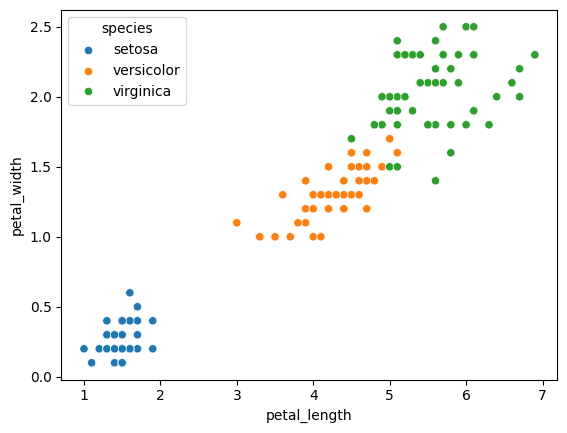

In [61]:
sns.scatterplot(df,x='petal_length',y='petal_width',hue='species')

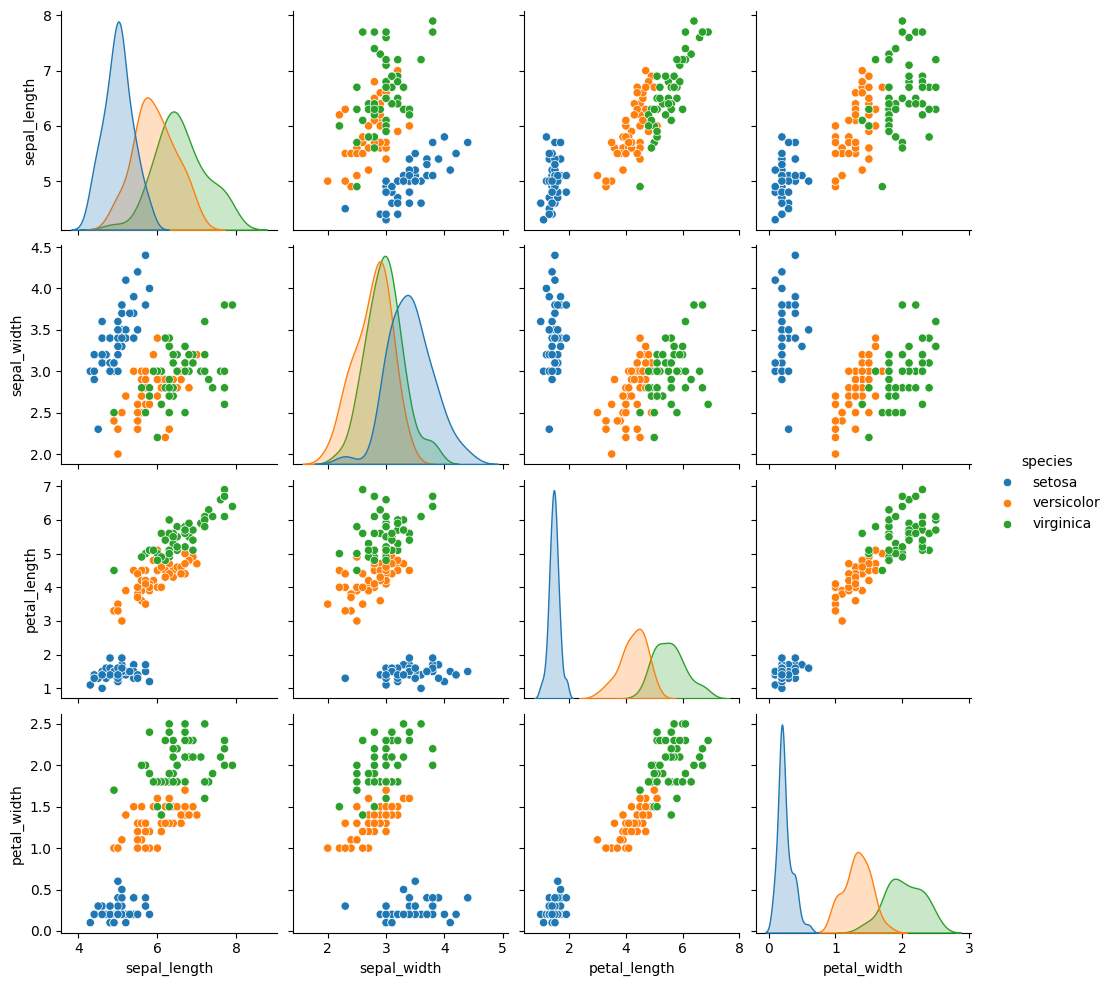

In [63]:
sns.pairplot(df,hue='species')

In [64]:
# minmax scaling 
# z-score scalign 
# decmail scaling 

In [65]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler =MinMaxScaler()
septal_length2=scaler.fit_transform(df[['sepal_length']])

In [66]:
petal_length2=scaler.fit_transform(df[['petal_length']])

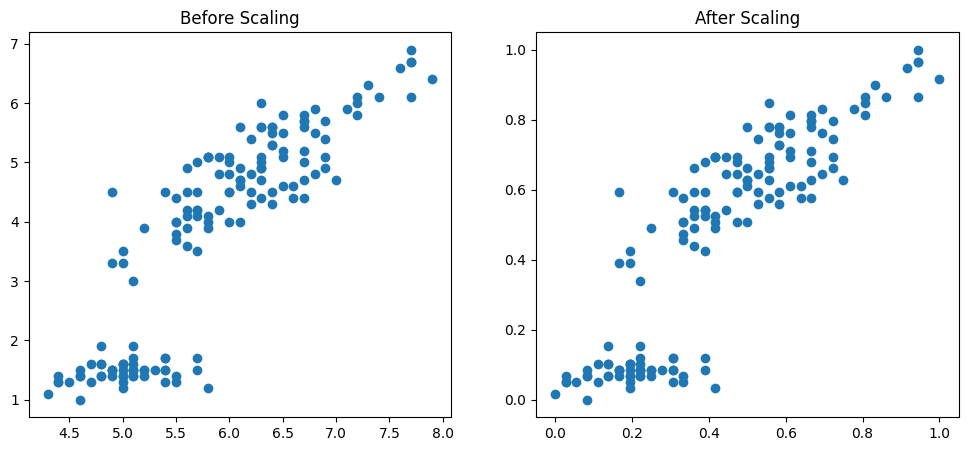

In [71]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(df['sepal_length'], df['petal_length'])
ax1.set_title("Before Scaling")
ax2.scatter(septal_length2,petal_length2)
ax2.set_title("After Scaling")
plt.show()

In [82]:
# decmail scling 

def decimal_cal(col) : 
    max=int(df[col].max())
    max_de=len(str(max))
    return 10**max_de 

In [81]:
decimal_scal('petal_length')

10

In [80]:
df['petal_length'].max()

6.9

In [90]:
def decimal_scal(num) : 
    return num/10

In [91]:
k =df['petal_length'].apply(decimal_scal)

In [92]:
m= df['sepal_length'].apply(decimal_scal)

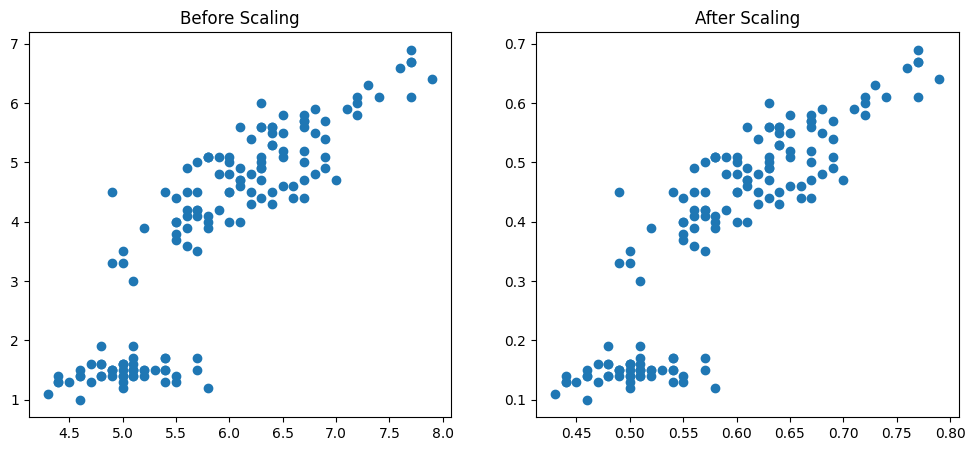

In [94]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(df['sepal_length'], df['petal_length'])
ax1.set_title("Before Scaling")
ax2.scatter(m,k)
ax2.set_title("After Scaling")
plt.show()

In [96]:
# z-score 
from sklearn.preprocessing import StandardScaler 
scaler2 =StandardScaler()
l=scaler2.fit_transform(df[['petal_length']])

In [98]:
p=scaler2.fit_transform(df[['sepal_length']])

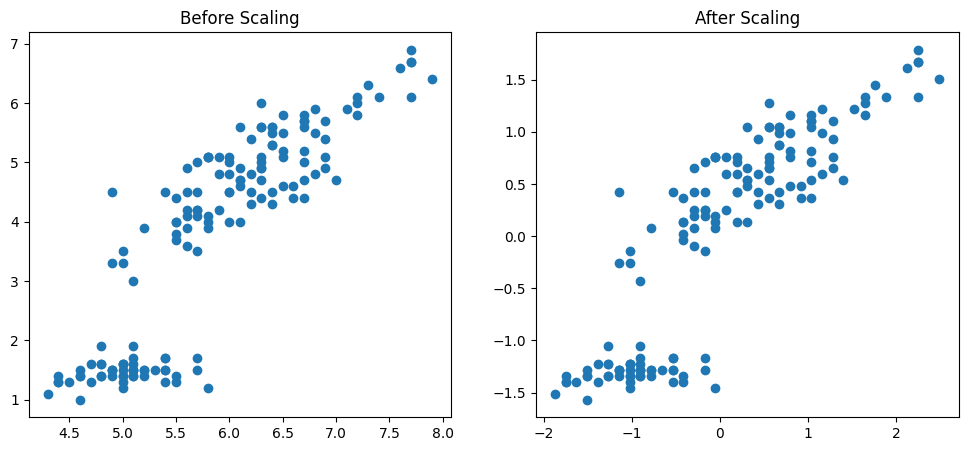

In [99]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(df['sepal_length'], df['petal_length'])
ax1.set_title("Before Scaling")
ax2.scatter(p,l)
ax2.set_title("After Scaling")
plt.show()

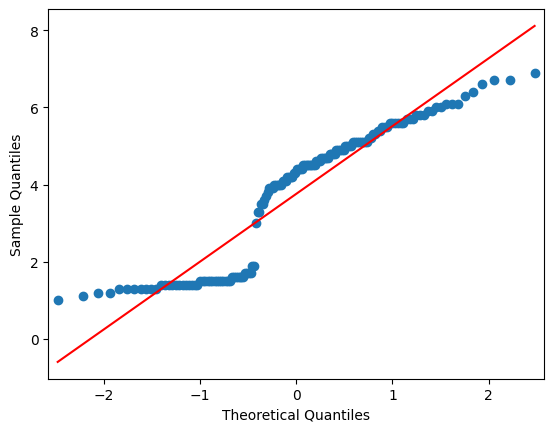

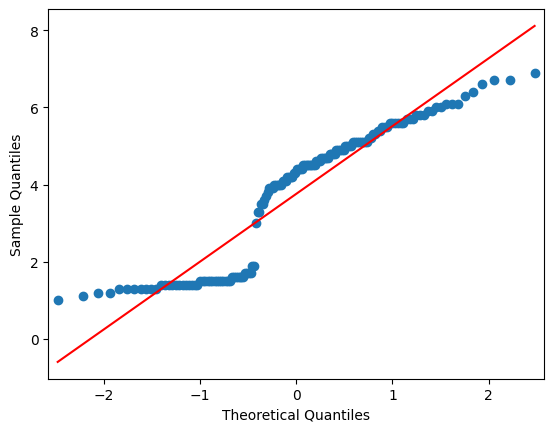

In [106]:
import statsmodels.api as stat 
import scipy as sci
import numpy as np 
stat.qqplot(df['petal_length'],line='s')

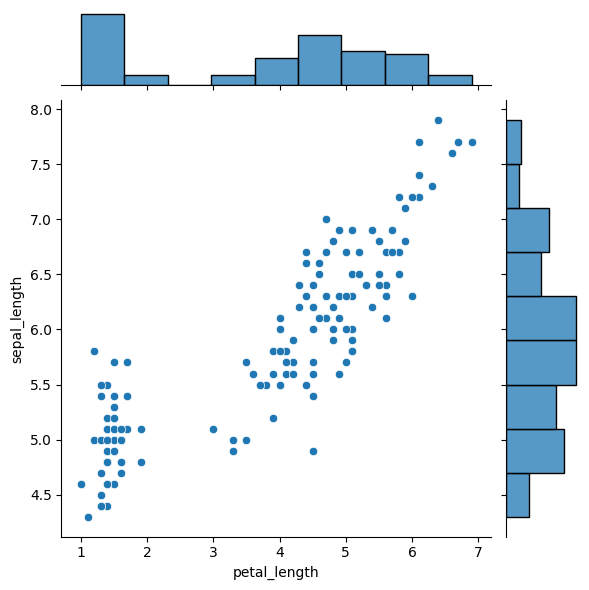

In [108]:
sns.jointplot(df,x='petal_length',y='sepal_length')

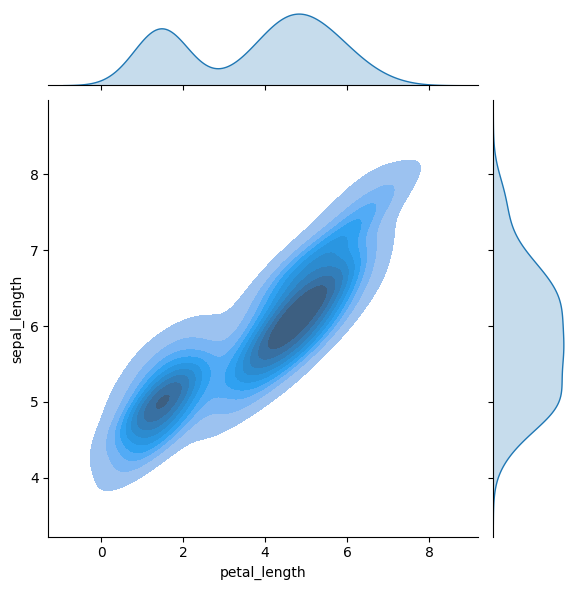

In [109]:
sns.jointplot(df,x='petal_length',y='sepal_length',kind='kde',fill=True)

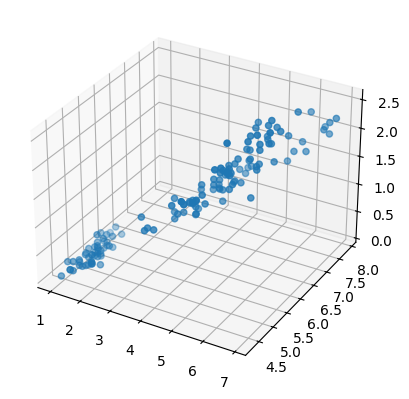

In [114]:
fig=plt.subplot(projection='3d')
fig.scatter(df['petal_length'],  df['sepal_length'],df['petal_width'])